## 📊 CAH – Classification Ascendante Hiérarchique  
> *Qui se ressemble s’assemble*


### 🔹 Étape 1 — Initialisation  
Tous les points du dataset sont considérés comme des classes distinctes (il y a autant de classes que de points).


### 🔹 Étape 2 — Calcul des distances  
On mesure les distances entre tous les points :

<img src="../img/machine_learning/clustering/cah.png" width="300"/>

On identifie les deux points les plus proches et on les fusionne en une seule classe :

<img src="../img/machine_learning/clustering/cah_1.png" width="300"/>

Puis, on calcule le **centre de gravité** de cette nouvelle classe  
(en pratique, la moyenne des coordonnées des points) :

<img src="../img/machine_learning/clustering/cah_3.png" width="300"/>


### 🔁 Étape 3 — Répétition du processus  

On répète l’étape 2 jusqu'à obtenir une seule classe globale :

<div style="display:flex; gap:10px">
  <img src="../img/machine_learning/clustering/cah_4.png" width="200"/>
  <img src="../img/machine_learning/clustering/cah_5.png" width="200"/>
  <img src="../img/machine_learning/clustering/cah_6.png" width="200"/>
</div>


Dans le dendogramme la hauteur du trait est proportionnel à la distance entre les 2 points :

<img src="../img/machine_learning/clustering/cah_7.png" width=300>

In [ ]:
import pandas as pd

data = pd.read_csv('../data/lung_cancer.csv', sep=';', index_col='id_sample')

# Données d'expression de 50 gènes (toutes numériques)
X = data.select_dtypes('number')
# Etiquettes des échantillons (le nom de la colonne est 'class')
y = data['class']

### Appliquer une normalisation centrée-réduite
Une normalisation de données est nécessaire pour ramener les niveaux d'expression de gènes à la même échelle

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)
# LEs étiquettes ne soont pas utilisées

#### Définir les couleurs pour chaque classe

In [ ]:
class_color = {'NTL': 'aquamarine', 'ADK': 'darkslateblue', 'SQC': 'darkorange'}
y_color = [class_color[c] for c in y]

#### Réaliser un clustering hiérarchique

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
import seaborn as sns

# Données à clusteriser (colonnes dans X_scaled → transpose)
X = X_scaled.T  # ou X_scaled si tu veux clusteriser les lignes

# Clustering hiérarchique
model = AgglomerativeClustering(
    n_clusters=3           # ou None pour construire un arbre complet
    affinity='euclidean',  # distance : 'euclidean', 'manhattan', ...
    linkage='ward',        # méthode d'agrégation : 'ward', 'complete', 'average', 'single'
    compute_distances=True # Permet de retrouver les distances de fusion, de récupérer la hiérarchie afin d'exporter un dendrogramme sans scipy
)
labels = model.fit_predict(X)

# Affichage optionnel d’une heatmap triée par cluster
sns.heatmap(X[np.argsort(labels)], cmap='coolwarm', center=0)


Pour reproduire exactement la clustermap avec dendrogrammes :

Il faut utiliser scipy pour construire la liaison (linkage) et afficher le dendrogramme

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Matrice de distance
Z = linkage(X, method='ward', metric='euclidean')

# Affichage du dendrogramme
plt.figure(figsize=(8, 5))
dendrogram(Z, labels=X.index if hasattr(X, 'index') else None)
plt.show()


`seaborn.clustermap` n'entraîne pas un algorithme au sens strict, mais il applique en interne un algorithme de clustering hiérarchique pour organiser visuellement les lignes et les colonnes — souvent utilisé pour l’analyse exploratoire (ex. en génomique ou en heatmap de corrélation).

`sns.clustermap` :
Calcule des distances (ex. euclidienne)

Applique un clustering hiérarchique (ex. méthode de Ward)

Trie les lignes/colonnes selon les clusters trouvés

Affiche une heatmap + dendrogrammes

Mais il n’expose pas directement les clusters obtenus (labels, objets, etc.).

In [ ]:
import seaborn as sns

metric = 'euclidean'
method = 'ward'
cmap = 'coolwarm'

clustergrid = sns.clustermap(X_scaled.T, figsize=(8, 7), metric=metric, method=method, cmap=cmap, 
                            #  on clusterise les lignes et les colonnes
                             row_cluster=True, col_cluster=True, 
                             #  ajoute une colonne de couleur pour les échantillons des cluster
                             col_colors=y_color,
                             center=0.0, vmin=-4.8, vmax=4.8)

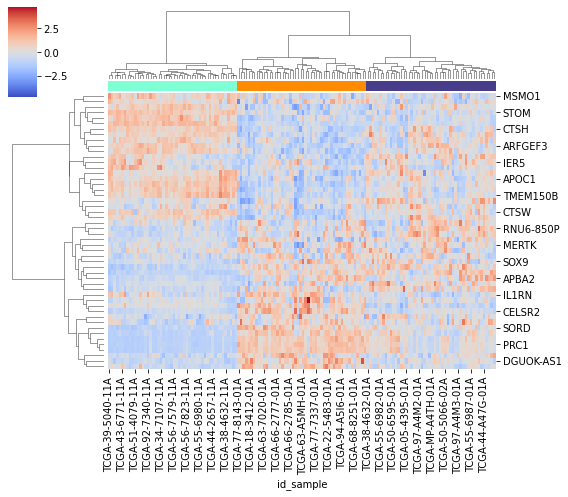